Inisialisasi Data

In [34]:
#contoh ada data

from os import sep
import numpy as np
import pandas as pd
# import k-means
from sklearn.cluster import KMeans

D = pd.read_csv('seeds_dataset.csv', delimiter=";", header=None)
D_new = D.copy()

Cek Data

In [ ]:
D.shape

In [ ]:
D.dtypes
    


In [35]:
import math
from scipy.special import softmax

for j in range(D.shape[1]):
    if(D[j].dtype == 'object'):

        feature_in_j = D[j].drop_duplicates()
        n = feature_in_j.size

        get_probability = D.groupby(j).size().div(len(D))

        probability = {}
        for i in range(feature_in_j.shape[0]):
            probability[i] = get_probability[i]

        subset_i_of_j = {}
        for i in range(n):
            subset_i_of_j[feature_in_j.iloc[i]] = 0
        
        new_subset_j = {}

        for i in range(n):
            
            sum_k_temp = 0
            for k in range(i):

                p_k = probability[k]
                sum_k_temp += (n - k) * p_k
            
            mu_i = ((n - i) - sum_k_temp) * math.sqrt((1 - (i * probability[i]**3))/ probability[i]*probability[j]*((i - j)**2))

            std_dev_i = probability[i]
            
            gaussian_distribution = np.random.normal(mu_i, std_dev_i)
            subset_i_of_j[feature_in_j.iloc[i]] = gaussian_distribution
            
        D_new[j].replace(subset_i_of_j, inplace=True)

In [36]:
print(D)
print(D_new)

     0      1      2       3      4      5      6      7  8
0    a  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    a  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    a  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    a  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    a  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..  ..    ...    ...     ...    ...    ...    ...    ... ..
205  d  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
206  d  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
207  d  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
208  d  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
209  d  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[210 rows x 9 columns]
            0      1      2       3      4      5      6      7  8
0   -0.025164  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1   -0.025164  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2   -0.025164  14.29  14.09  0.9050  5.291  3.337  2.69

In [37]:
# labelled data using sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
D[0] = le.fit_transform(D[0])


In [39]:
# normalize data using standard scaler
from sklearn.preprocessing import StandardScaler
UFT_scaler = StandardScaler()
UFT_scaled = UFT_scaler.fit_transform(D_new)
# print(UFT_scaled)
normal_scaler = StandardScaler()
normal_scaled = normal_scaler.fit_transform(D)
# print(normal_scaled)

print(normal_scaled)
print(UFT_scaled)


[[-1.3822179   0.14209777  0.21546244 ... -0.98615174 -0.38357742
  -1.22474487]
 [-1.3822179   0.01118803  0.00822376 ... -1.7881662  -0.92201349
  -1.22474487]
 [-1.3822179  -0.19206658 -0.36020056 ... -0.66747933 -1.18919199
  -1.22474487]
 ...
 [ 1.25656172 -0.56757084 -0.69024735 ...  3.07658816 -0.71806043
   1.22474487]
 [ 1.25656172 -1.03608992 -1.03564515 ... -0.0681352  -0.7425348
   1.22474487]
 [ 1.25656172 -0.87762023 -0.93586356 ...  1.29122264 -0.70378372
   1.22474487]]
[[ 0.12053086  0.14209777  0.21546244 ... -0.98615174 -0.38357742
  -1.22474487]
 [ 0.12053086  0.01118803  0.00822376 ... -1.7881662  -0.92201349
  -1.22474487]
 [ 0.12053086 -0.19206658 -0.36020056 ... -0.66747933 -1.18919199
  -1.22474487]
 ...
 [-1.49535524 -0.56757084 -0.69024735 ...  3.07658816 -0.71806043
   1.22474487]
 [-1.49535524 -1.03608992 -1.03564515 ... -0.0681352  -0.7425348
   1.22474487]
 [-1.49535524 -0.87762023 -0.93586356 ...  1.29122264 -0.70378372
   1.22474487]]


In [42]:
X = D.iloc[:, :8].values
y = D.iloc[:, 8].values

X_uft = D_new.iloc[:, :8].values
y_uft = D_new.iloc[:, 8].values


In [43]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
mi_score_uft = MIC(X_uft,y_uft)
print(mi_score)
print(mi_score_uft)


[0.81504666 0.81170804 0.79924118 0.29281799 0.64947657 0.72831862
 0.18308622 0.59087617]
[0.80813768 0.80293253 0.79635065 0.28943062 0.64871899 0.73278952
 0.18136665 0.58752583]


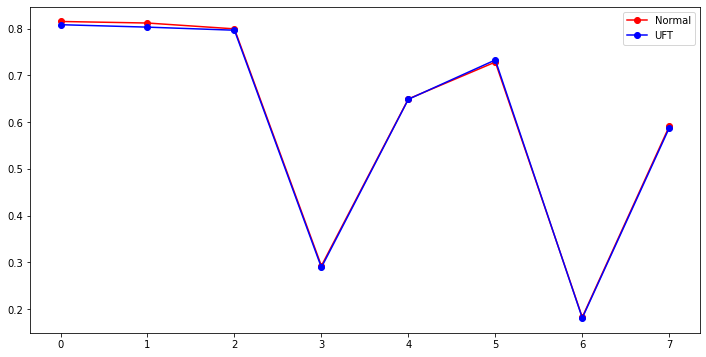

In [46]:
# plot the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(mi_score, 'ro-', label='Normal')
plt.plot(mi_score_uft, 'bo-', label='UFT')
plt.legend()

In [47]:
kmeans_uft = KMeans(n_clusters=3, random_state=0)
kmeans_uft.fit(D_new)
kmeans_normal = KMeans(n_clusters=3, random_state=0)
kmeans_normal.fit(D)

KMeans(n_clusters=3, random_state=0)

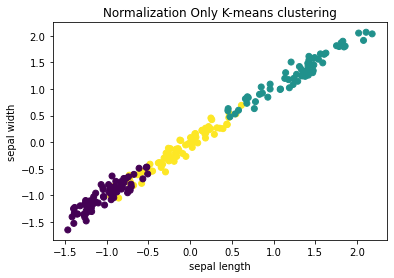

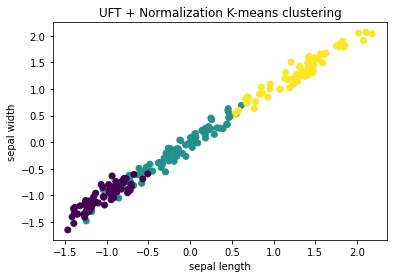

In [49]:
# plot data
import matplotlib.pyplot as plt

# initialize plot 1
plt.figure(1)
plt.scatter(normal_scaled[:, 1], normal_scaled[:, 2], c=kmeans_normal.labels_, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Normalization Only K-means clustering')

# initialize plot 2
plt.figure(2)
plt.scatter(UFT_scaled[:, 1], UFT_scaled[:, 2], c=kmeans_uft.labels_, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('UFT + Normalization K-means clustering')

plt.show()